In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Excel file into a Pandas DataFrame
df = pd.read_csv('edits of prepared data/2nd_setup_17_peaks_20k_3_ch.csv')

In [3]:
df

,test_id,gas,oil,water,ch1_p1,ch1_p2,ch1_p3,ch1_p4,ch1_p5,ch1_p6,...,ch4_p8,ch4_p9,ch4_p10,ch4_p11,ch4_p12,ch4_p13,ch4_p14,ch4_p15,ch4_p16,ch4_p17
0,GOW_00,0.059070,0.552676,0.026829,443.486864,886.937391,0.016516,2273.715400,1227.200431,3410.769645,...,1227.200431,11407.522530,6913.796264,9157.996964,15212.969950,6266.841299,12045.201920,8743.364147,13023.091500,10150.807400
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GOW_01c,5.566442,8.711272,20.017094,7.039264,2272.232233,456.680116,1340.195322,8750.109421,6250.077214,...,5062.912392,1340.195322,15841.865950,8442.069762,7220.613714,17675.404360,10320.935620,16437.550890,15116.679690,10926.236370
3,GOW_01,2.182627,8.709136,20.019243,0.006607,451.358552,2456.072315,1337.935887,4956.104522,11250.141630,...,451.358552,4333.613561,7979.050674,3574.208743,8750.109421,15840.620620,6891.588393,14823.825150,6035.150076,9799.148087
4,GOW_02,2.544509,11.528075,26.634452,450.202408,6.936863,2277.629773,1350.749264,3416.438053,11250.141630,...,15956.423290,5145.504004,11011.143570,4539.166024,8908.643166,3750.048310,13710.134920,15148.582650,16387.407280,19379.979880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,W_501,0.036427,0.000000,49.999870,446.205453,11.128710,892.410907,2537.573849,3458.062534,4786.960680,...,3610.547996,15995.088040,5698.348861,3078.834145,2085.012908,6257.542600,7980.715521,15067.728560,10194.251980,4962.526075
224,W_502C3,0.000000,0.000000,59.995398,545.719708,164.836381,4888.129871,1132.631169,3467.694864,3847.570694,...,5704.156007,2746.746694,3701.041025,14825.110120,2330.449030,5126.979277,6892.787479,10878.342290,8892.850241,6162.372143
225,W_502C6,0.000000,0.000000,59.998810,539.750702,168.694598,1133.906230,5030.550275,3734.404033,1709.847538,...,4254.189783,2749.772487,3431.071531,2340.841111,6906.482829,3842.192974,6251.012039,5195.561729,10907.539870,7445.549755
226,W_502,0.000000,0.000000,60.001667,445.792545,16.727750,891.581786,2710.608941,5716.427648,5199.393520,...,3610.914658,2813.806339,5185.308385,6259.478315,15997.872700,19222.030820,10136.375420,16526.194090,8044.141571,14580.334650


In [4]:
df = df.drop(columns=['test_id'])

In [5]:
df

,gas,oil,water,ch1_p1,ch1_p2,ch1_p3,ch1_p4,ch1_p5,ch1_p6,ch1_p7,...,ch4_p8,ch4_p9,ch4_p10,ch4_p11,ch4_p12,ch4_p13,ch4_p14,ch4_p15,ch4_p16,ch4_p17
0,0.059070,0.552676,0.026829,443.486864,886.937391,0.016516,2273.715400,1227.200431,3410.769645,5684.557717,...,1227.200431,11407.522530,6913.796264,9157.996964,15212.969950,6266.841299,12045.201920,8743.364147,13023.091500,10150.807400
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.566442,8.711272,20.017094,7.039264,2272.232233,456.680116,1340.195322,8750.109421,6250.077214,3408.242645,...,5062.912392,1340.195322,15841.865950,8442.069762,7220.613714,17675.404360,10320.935620,16437.550890,15116.679690,10926.236370
3,2.182627,8.709136,20.019243,0.006607,451.358552,2456.072315,1337.935887,4956.104522,11250.141630,8750.109421,...,451.358552,4333.613561,7979.050674,3574.208743,8750.109421,15840.620620,6891.588393,14823.825150,6035.150076,9799.148087
4,2.544509,11.528075,26.634452,450.202408,6.936863,2277.629773,1350.749264,3416.438053,11250.141630,8750.109421,...,15956.423290,5145.504004,11011.143570,4539.166024,8908.643166,3750.048310,13710.134920,15148.582650,16387.407280,19379.979880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.036427,0.000000,49.999870,446.205453,11.128710,892.410907,2537.573849,3458.062534,4786.960680,8750.112724,...,3610.547996,15995.088040,5698.348861,3078.834145,2085.012908,6257.542600,7980.715521,15067.728560,10194.251980,4962.526075
224,0.000000,0.000000,59.995398,545.719708,164.836381,4888.129871,1132.631169,3467.694864,3847.570694,1551.878651,...,5704.156007,2746.746694,3701.041025,14825.110120,2330.449030,5126.979277,6892.787479,10878.342290,8892.850241,6162.372143
225,0.000000,0.000000,59.998810,539.750702,168.694598,1133.906230,5030.550275,3734.404033,1709.847538,3369.762875,...,4254.189783,2749.772487,3431.071531,2340.841111,6906.482829,3842.192974,6251.012039,5195.561729,10907.539870,7445.549755
226,0.000000,0.000000,60.001667,445.792545,16.727750,891.581786,2710.608941,5716.427648,5199.393520,4813.542078,...,3610.914658,2813.806339,5185.308385,6259.478315,15997.872700,19222.030820,10136.375420,16526.194090,8044.141571,14580.334650


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 54 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gas      217 non-null    float64
 1   oil      217 non-null    float64
 2   water    217 non-null    float64
 3   ch1_p1   217 non-null    float64
 4   ch1_p2   217 non-null    float64
 5   ch1_p3   217 non-null    float64
 6   ch1_p4   217 non-null    float64
 7   ch1_p5   217 non-null    float64
 8   ch1_p6   217 non-null    float64
 9   ch1_p7   217 non-null    float64
 10  ch1_p8   217 non-null    float64
 11  ch1_p9   217 non-null    float64
 12  ch1_p10  217 non-null    float64
 13  ch1_p11  217 non-null    float64
 14  ch1_p12  217 non-null    float64
 15  ch1_p13  217 non-null    float64
 16  ch1_p14  217 non-null    float64
 17  ch1_p15  217 non-null    float64
 18  ch1_p16  217 non-null    float64
 19  ch1_p17  217 non-null    float64
 20  ch2_p1   217 non-null    float64
 21  ch2_p2   217 non

In [8]:
df

,gas,oil,water,ch1_p1,ch1_p2,ch1_p3,ch1_p4,ch1_p5,ch1_p6,ch1_p7,...,ch4_p8,ch4_p9,ch4_p10,ch4_p11,ch4_p12,ch4_p13,ch4_p14,ch4_p15,ch4_p16,ch4_p17
0,0.059070,0.552676,0.026829,443.486864,886.937391,0.016516,2273.715400,1227.200431,3410.769645,5684.557717,...,1227.200431,11407.522530,6913.796264,9157.996964,15212.969950,6266.841299,12045.201920,8743.364147,13023.091500,10150.807400
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.566442,8.711272,20.017094,7.039264,2272.232233,456.680116,1340.195322,8750.109421,6250.077214,3408.242645,...,5062.912392,1340.195322,15841.865950,8442.069762,7220.613714,17675.404360,10320.935620,16437.550890,15116.679690,10926.236370
3,2.182627,8.709136,20.019243,0.006607,451.358552,2456.072315,1337.935887,4956.104522,11250.141630,8750.109421,...,451.358552,4333.613561,7979.050674,3574.208743,8750.109421,15840.620620,6891.588393,14823.825150,6035.150076,9799.148087
4,2.544509,11.528075,26.634452,450.202408,6.936863,2277.629773,1350.749264,3416.438053,11250.141630,8750.109421,...,15956.423290,5145.504004,11011.143570,4539.166024,8908.643166,3750.048310,13710.134920,15148.582650,16387.407280,19379.979880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.036427,0.000000,49.999870,446.205453,11.128710,892.410907,2537.573849,3458.062534,4786.960680,8750.112724,...,3610.547996,15995.088040,5698.348861,3078.834145,2085.012908,6257.542600,7980.715521,15067.728560,10194.251980,4962.526075
224,0.000000,0.000000,59.995398,545.719708,164.836381,4888.129871,1132.631169,3467.694864,3847.570694,1551.878651,...,5704.156007,2746.746694,3701.041025,14825.110120,2330.449030,5126.979277,6892.787479,10878.342290,8892.850241,6162.372143
225,0.000000,0.000000,59.998810,539.750702,168.694598,1133.906230,5030.550275,3734.404033,1709.847538,3369.762875,...,4254.189783,2749.772487,3431.071531,2340.841111,6906.482829,3842.192974,6251.012039,5195.561729,10907.539870,7445.549755
226,0.000000,0.000000,60.001667,445.792545,16.727750,891.581786,2710.608941,5716.427648,5199.393520,4813.542078,...,3610.914658,2813.806339,5185.308385,6259.478315,15997.872700,19222.030820,10136.375420,16526.194090,8044.141571,14580.334650


In [9]:
df.isna().sum()

gas        11
oil        11
water      11
ch1_p1     11
ch1_p2     11
ch1_p3     11
ch1_p4     11
ch1_p5     11
ch1_p6     11
ch1_p7     11
ch1_p8     11
ch1_p9     11
ch1_p10    11
ch1_p11    11
ch1_p12    11
ch1_p13    11
ch1_p14    11
ch1_p15    11
ch1_p16    11
ch1_p17    11
ch2_p1     11
ch2_p2     11
ch2_p3     11
ch2_p4     11
ch2_p5     11
ch2_p6     11
ch2_p7     11
ch2_p8     11
ch2_p9     11
ch2_p10    11
ch2_p11    11
ch2_p12    11
ch2_p13    11
ch2_p14    11
ch2_p15    11
ch2_p16    11
ch2_p17    11
ch4_p1     11
ch4_p2     11
ch4_p3     11
ch4_p4     11
ch4_p5     11
ch4_p6     11
ch4_p7     11
ch4_p8     11
ch4_p9     11
ch4_p10    11
ch4_p11    11
ch4_p12    11
ch4_p13    11
ch4_p14    11
ch4_p15    11
ch4_p16    11
ch4_p17    11
dtype: int64

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
df

,gas,oil,water,ch1_p1,ch1_p2,ch1_p3,ch1_p4,ch1_p5,ch1_p6,ch1_p7,...,ch4_p8,ch4_p9,ch4_p10,ch4_p11,ch4_p12,ch4_p13,ch4_p14,ch4_p15,ch4_p16,ch4_p17
0,0.059070,0.552676,0.026829,443.486864,886.937391,0.016516,2273.715400,1227.200431,3410.769645,5684.557717,...,1227.200431,11407.522530,6913.796264,9157.996964,15212.969950,6266.841299,12045.201920,8743.364147,13023.091500,10150.807400
2,5.566442,8.711272,20.017094,7.039264,2272.232233,456.680116,1340.195322,8750.109421,6250.077214,3408.242645,...,5062.912392,1340.195322,15841.865950,8442.069762,7220.613714,17675.404360,10320.935620,16437.550890,15116.679690,10926.236370
3,2.182627,8.709136,20.019243,0.006607,451.358552,2456.072315,1337.935887,4956.104522,11250.141630,8750.109421,...,451.358552,4333.613561,7979.050674,3574.208743,8750.109421,15840.620620,6891.588393,14823.825150,6035.150076,9799.148087
4,2.544509,11.528075,26.634452,450.202408,6.936863,2277.629773,1350.749264,3416.438053,11250.141630,8750.109421,...,15956.423290,5145.504004,11011.143570,4539.166024,8908.643166,3750.048310,13710.134920,15148.582650,16387.407280,19379.979880
5,3.291336,14.250283,33.346524,449.819229,6.926953,2275.304272,1340.208535,4954.964895,3412.972925,6250.077214,...,4954.964895,15922.221250,10291.549740,4539.341097,13837.459390,11064.161030,6250.077214,15208.487420,19344.007290,13398.798600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.036427,0.000000,49.999870,446.205453,11.128710,892.410907,2537.573849,3458.062534,4786.960680,8750.112724,...,3610.547996,15995.088040,5698.348861,3078.834145,2085.012908,6257.542600,7980.715521,15067.728560,10194.251980,4962.526075
224,0.000000,0.000000,59.995398,545.719708,164.836381,4888.129871,1132.631169,3467.694864,3847.570694,1551.878651,...,5704.156007,2746.746694,3701.041025,14825.110120,2330.449030,5126.979277,6892.787479,10878.342290,8892.850241,6162.372143
225,0.000000,0.000000,59.998810,539.750702,168.694598,1133.906230,5030.550275,3734.404033,1709.847538,3369.762875,...,4254.189783,2749.772487,3431.071531,2340.841111,6906.482829,3842.192974,6251.012039,5195.561729,10907.539870,7445.549755
226,0.000000,0.000000,60.001667,445.792545,16.727750,891.581786,2710.608941,5716.427648,5199.393520,4813.542078,...,3610.914658,2813.806339,5185.308385,6259.478315,15997.872700,19222.030820,10136.375420,16526.194090,8044.141571,14580.334650


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5]),
 [Text(0.5, 0, 'gas'),
  Text(1.5, 0, 'oil'),
  Text(2.5, 0, 'water'),
  Text(3.5, 0, 'ch1_p1'),
  Text(4.5, 0, 'ch1_p2'),
  Text(5.5, 0, 'ch1_p3'),
  Text(6.5, 0, 'ch1_p4'),
  Text(7.5, 0, 'ch1_p5'),
  Text(8.5, 0, 'ch1_p6'),
  Text(9.5, 0, 'ch1_p7'),
  Text(10.5, 0, 'ch1_p8'),
  Text(11.5, 0, 'ch1_p9'),
  Text(12.5, 0, 'ch1_p10'),
  Text(13.5, 0, 'ch1_p11'),
  Text(14.5, 0, 'ch1_p12'),
  Text(15.5, 0, 'ch1_p13'),
  Text(16.5, 0, 'ch1_p14'),
  Text(17.5, 0, 'ch1_p15'),
  Text(18.5, 0, 'ch1_p16'),
  Text(19.5, 0, 'ch1_p17'),
  Text(20.5, 0, 'ch2_p1'),
  Text(21.5, 0, 'ch2_p2'),
  Text(22.5, 0, 'ch2_p3'),
  Text(23.5, 0, 'ch2_p

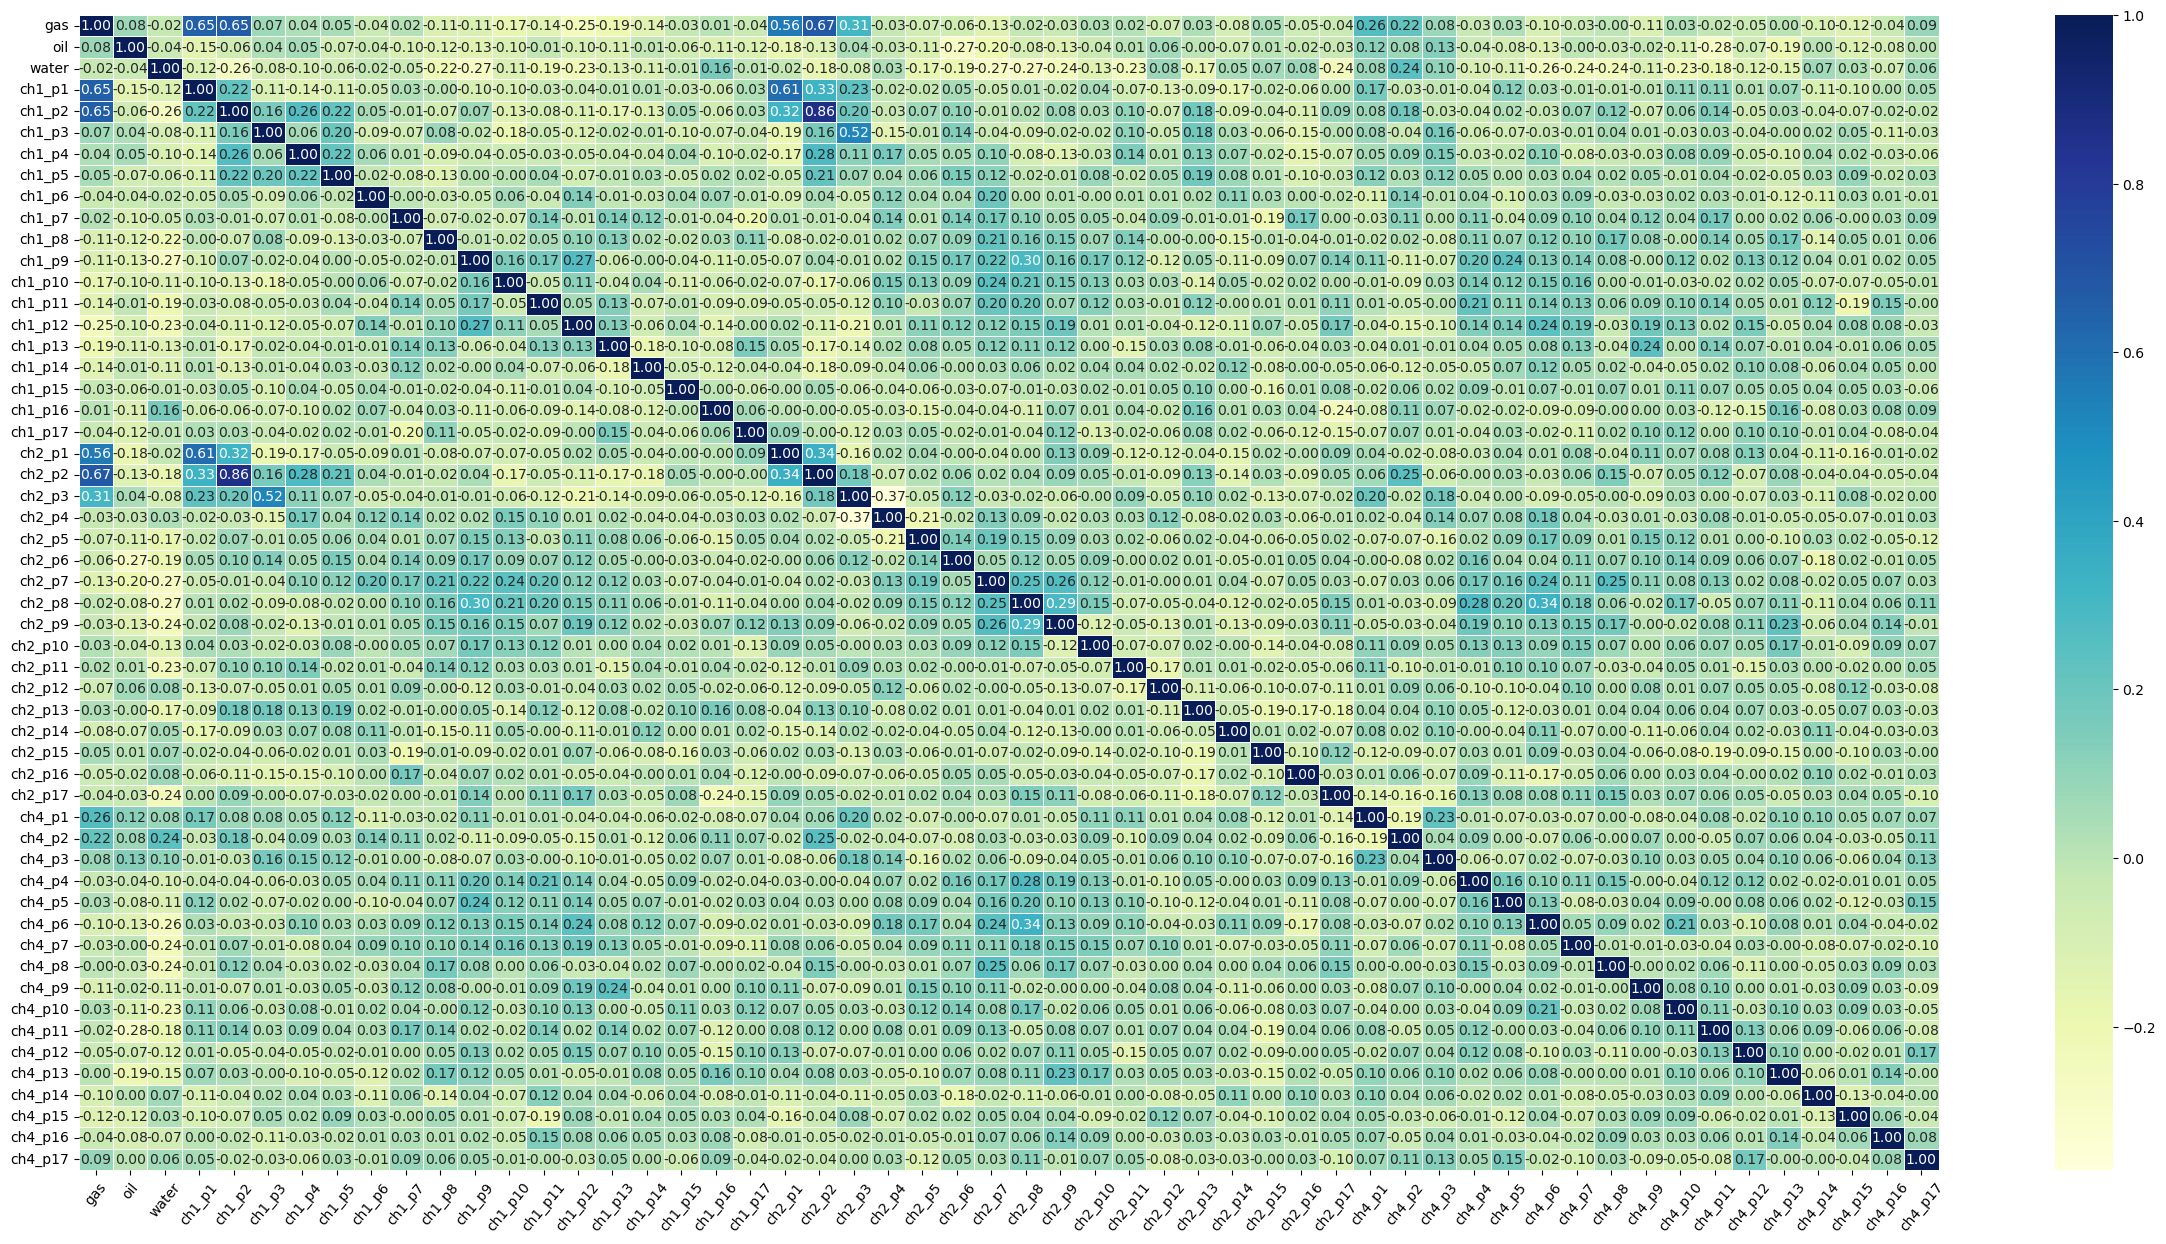

In [12]:
# Correlation matrix
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
plt.xticks(rotation = 50)

In [16]:
df.columns

Index(['gas', 'oil', 'water', 'ch1_p1', 'ch1_p2', 'ch1_p3', 'ch1_p4', 'ch1_p5',
       'ch1_p6', 'ch1_p7', 'ch1_p8', 'ch1_p9', 'ch1_p10', 'ch1_p11', 'ch1_p12',
       'ch1_p13', 'ch1_p14', 'ch1_p15', 'ch1_p16', 'ch1_p17', 'ch2_p1',
       'ch2_p2', 'ch2_p3', 'ch2_p4', 'ch2_p5', 'ch2_p6', 'ch2_p7', 'ch2_p8',
       'ch2_p9', 'ch2_p10', 'ch2_p11', 'ch2_p12', 'ch2_p13', 'ch2_p14',
       'ch2_p15', 'ch2_p16', 'ch2_p17', 'ch4_p1', 'ch4_p2', 'ch4_p3', 'ch4_p4',
       'ch4_p5', 'ch4_p6', 'ch4_p7', 'ch4_p8', 'ch4_p9', 'ch4_p10', 'ch4_p11',
       'ch4_p12', 'ch4_p13', 'ch4_p14', 'ch4_p15', 'ch4_p16', 'ch4_p17'],
      dtype='object')

In [17]:
# Split the data into train, validation and test
train, test = train_test_split(df, test_size=0.2, random_state = 1)
train, val = train_test_split(train, test_size=0.1, random_state = 1)

In [18]:
# Helper functions
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

def format_output(data):
    y1 = data.pop('gas')
    y1 = np.array(y1)
    y2 = data.pop('oil')
    y2 = np.array(y2)
    y3 = data.pop('water')
    y3 = np.array(y3)
    return y1, y2, y3

In [19]:
# Get gas, oil and water as the outputs and format them as np arrays
train_stats = train.describe()
train_stats.pop('gas')
train_stats.pop('oil')
train_stats.pop('water')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)
val_Y = format_output(val)

print(train_stats)

         count          mean          std          min          25%  \
ch1_p1   155.0    311.114426  1216.333909     0.006607     6.936863   
ch1_p2   155.0   1391.412750  1397.341003     0.009910   455.964959   
ch1_p3   155.0   1753.515719  2164.570369     0.009910   379.401811   
ch1_p4   155.0   3402.783877  2487.859700   462.850621  1347.685483   
ch1_p5   155.0   4750.352435  2914.832674     7.141666  3410.946370   
ch1_p6   155.0   5471.253975  2785.854290   461.113102  3427.730275   
ch1_p7   155.0   6254.155833  3432.129748   379.106169  3429.953374   
ch1_p8   155.0   7301.540564  3925.040619     7.002928  3750.049962   
ch1_p9   155.0   7210.741780  4178.475754   466.930157  3750.046659   
ch1_p10  155.0   8352.081045  4684.084094   463.028998  3830.033643   
ch1_p11  155.0   9960.093666  5123.943498  1324.088587  5675.453910   
ch1_p12  155.0   9663.538852  5276.380237   377.996271  5683.558479   
ch1_p13  155.0   9793.145985  5885.703802   465.162909  5333.306356   
ch1_p1

In [20]:
# Normalize the training, validation and test data
norm_train_X = np.array(norm(train))
norm_test_X = np.array(norm(test))
norm_val_X = np.array(norm(val))

In [79]:
def build_model():
    # Define model layers.
    input_layer = Input(shape=(len(train.columns),))
    first_dense = Dense(units='128', activation='relu')(input_layer)

    second_dense_1 = Dense(units='128', activation='relu')(first_dense)
    third_dense_1 = Dense(units='128', activation='relu')(second_dense_1)
    fourth_dense_1 = Dense(units='128', activation='relu')(third_dense_1)
    fifth_dense_1 = Dense(units='128', activation='relu')(fourth_dense_1)
    sixth_dense_1 = Dense(units='128', activation='relu')(fifth_dense_1)
    seventh_dense_1 = Dense(units='128', activation='relu')(sixth_dense_1)
    eight_dense_1 = Dense(units='128', activation='relu')(seventh_dense_1)
    ninth_dense_1 = Dense(units='128', activation='relu')(eight_dense_1)
    tenth_dense_1 = Dense(units='128', activation='relu')(ninth_dense_1)
    eleventh_dense_1 = Dense(units='128', activation='relu')(tenth_dense_1)
    twelfth_dense_1 = Dense(units='128', activation='relu')(eleventh_dense_1)
    thirteenth_dense_1 = Dense(units='128', activation='relu')(twelfth_dense_1)
    fourteenth_dense_1 = Dense(units='128', activation='relu')(thirteenth_dense_1)
    # Y1 output will be fed from the second dense 1
    y1_output = Dense(units='1', name='gas_output')(fourth_dense_1)

    second_dense_2 = Dense(units='128', activation='relu')(first_dense)
    third_dense_2 = Dense(units='128', activation='relu')(second_dense_2)
    fourth_dense_2 = Dense(units='128', activation='relu')(third_dense_2)
    fifth_dense_2 = Dense(units='128', activation='relu')(fourth_dense_2)
    sixth_dense_2 = Dense(units='128', activation='relu')(fifth_dense_2)
    # Y2 output will be fed from the second dense 2
    y2_output = Dense(units='1', name='oil_output')(fifth_dense_2)

    second_dense_3 = Dense(units='128', activation='relu')(first_dense)
    third_dense_3 = Dense(units='128', activation='relu')(second_dense_3)
    fourth_dense_3 = Dense(units='128', activation='relu')(third_dense_3)
    # Y3 output will be fed from the third dense 3
    y3_output = Dense(units='1', name='water_output')(fourth_dense_3)

    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=[y1_output, y2_output, y3_output])

    return model

In [101]:
model = build_model()

# Specifying the optimizer, and compiling the model with loss functions
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00015)
model.compile(optimizer=optimizer,
              loss={'gas_output': 'mse', 'oil_output': 'mse', 'water_output': 'mse'},
              metrics={'gas_output': tf.keras.metrics.RootMeanSquaredError(),
                       'oil_output': tf.keras.metrics.RootMeanSquaredError(),
                       'water_output': tf.keras.metrics.RootMeanSquaredError()})

In [102]:
# Train the model
history = model.fit(norm_train_X, train_Y,
                    epochs=10,
                    batch_size=2,
                    validation_data=(norm_val_X, val_Y))

Epoch 1/10
78/78 [==============================] - 2s 5ms/step - loss: 1263.9933 - gas_output_loss: 418.4623 - oil_output_loss: 353.8037 - water_output_loss: 491.7274 - gas_output_root_mean_squared_error: 20.4564 - oil_output_root_mean_squared_error: 18.8097 - water_output_root_mean_squared_error: 22.1749 - val_loss: 692.5565 - val_gas_output_loss: 93.8752 - val_oil_output_loss: 163.6258 - val_water_output_loss: 435.0555 - val_gas_output_root_mean_squared_error: 9.6889 - val_oil_output_root_mean_squared_error: 12.7916 - val_water_output_root_mean_squared_error: 20.8580
Epoch 2/10
78/78 [==============================] - 0s 2ms/step - loss: 887.7773 - gas_output_loss: 367.3547 - oil_output_loss: 158.9341 - water_output_loss: 361.4886 - gas_output_root_mean_squared_error: 19.1665 - oil_output_root_mean_squared_error: 12.6069 - water_output_root_mean_squared_error: 19.0129 - val_loss: 334.1000 - val_gas_output_loss: 60.1249 - val_oil_output_loss: 99.2044 - val_water_output_loss: 174.7707

In [104]:
# Test the model and print loss and rmse (validation data)
loss, Y1_loss, Y2_loss, Y3_loss, Y1_rmse, Y2_rmse, Y3_rmse = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'gas_loss: {Y1_loss}')
print(f'oil_loss: {Y2_loss}')
print(f'water_loss: {Y3_loss}')
print(f'gas_rmse: {Y1_rmse}')
print(f'oil_rmse: {Y2_rmse}')
print(f'water_rmse: {Y3_rmse}')

1/1 [==============================] - 0s 170ms/step - loss: 198.6189 - gas_output_loss: 29.1869 - oil_output_loss: 107.6512 - water_output_loss: 61.7808 - gas_output_root_mean_squared_error: 5.4025 - oil_output_root_mean_squared_error: 10.3755 - water_output_root_mean_squared_error: 7.8601

loss: 198.61888122558594
gas_loss: 29.18686866760254
oil_loss: 107.65123748779297
water_loss: 61.78077697753906
gas_rmse: 5.402487277984619
oil_rmse: 10.375511169433594
water_rmse: 7.860074996948242


In [105]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values - Flow rate [m^3/ℎ]')
    plt.ylabel('Predictions - Flow rate [m^3/ℎ]')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show() 


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.xlabel('epoch')
    plt.ylabel('rmse')
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.legend()
    plt.show()

In [106]:
dff = pd.read_csv('edits of prepared data/2nd_setup_customtest_17p_20kHz_3_ch.csv')
dff = dff.drop(columns=['test_id'])

In [107]:
# formating and adding the seperated dataset for testing
test2_Y = format_output(dff)
norm_test2_X = np.array(norm(dff))

In [108]:
final_test_X = np.concatenate((norm_test_X, norm_test2_X), axis=0)
final_test_X.shape

(55, 51)

In [109]:
norm_test_X.shape, norm_test2_X.shape

((44, 51), (11, 51))

In [110]:
test_Y

(array([ 5.44644333, 18.49094272, 26.61791399,  3.68025384,  6.70929037,
        11.13483167, 14.08843493,  0.15523256,  4.07120879,  3.29133624,
         5.64042171,  0.        ,  0.        ,  0.        , 13.40466534,
        20.26837312, 10.33554616, 14.58180085, 32.36561576,  7.40824506,
         9.92963921, 14.2439846 ,  0.        ,  0.1758436 ,  0.        ,
         4.91701677, 10.21740525, 26.3367057 , 11.60038785, 19.74793647,
         9.42651608,  0.        ,  9.90188901,  0.05364958,  0.05629058,
        10.69670454,  0.05906966,  6.85782192,  0.        ,  0.        ,
         7.14280987,  2.94314187,  8.44119022, 14.16016701]),
 array([ 7.80223423, 52.93446736, 52.80179703, 13.63398689, 12.15632012,
        19.92356297, 15.58038109, 10.57345154, 34.80062355, 14.25028292,
        13.60876192, 25.91161453,  0.        , 32.90832404, 23.79728682,
        34.69803045,  5.99822554, 10.37499714, 15.57444746,  0.        ,
         0.        , 16.91555663, 25.9221929 , 15.04848408,  0

In [111]:
test2_Y

(array([  5.66051683,   2.44004448, 163.5269404 ,   0.        ,
          0.        ,  22.90864788,   0.        ,   3.73354347,
          0.        ,   0.        ,  80.95472089]),
 array([ 8.72881406, 23.6920163 ,  0.        , 21.85201208,  0.        ,
        59.99534449, 39.87652198,  0.        ,  0.        , 29.92592675,
         0.        ]),
 array([20.04460946, 23.92886849,  0.        , 18.15546066, 50.00117203,
         0.        ,  0.12265225, 40.00067082, 50.00203841,  0.07426103,
         0.        ]))

In [112]:
final_test_Y = tuple()
for t1, t2 in zip(test_Y, test2_Y):
    final_test_Y += (np.concatenate([t1, t2]),)

print(final_test_Y)

(array([5.44644333e+00, 1.84909427e+01, 2.66179140e+01, 3.68025384e+00,
       6.70929037e+00, 1.11348317e+01, 1.40884349e+01, 1.55232557e-01,
       4.07120879e+00, 3.29133624e+00, 5.64042171e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.34046653e+01, 2.02683731e+01,
       1.03355462e+01, 1.45818009e+01, 3.23656158e+01, 7.40824506e+00,
       9.92963921e+00, 1.42439846e+01, 0.00000000e+00, 1.75843596e-01,
       0.00000000e+00, 4.91701677e+00, 1.02174053e+01, 2.63367057e+01,
       1.16003879e+01, 1.97479365e+01, 9.42651608e+00, 0.00000000e+00,
       9.90188901e+00, 5.36495790e-02, 5.62905760e-02, 1.06967045e+01,
       5.90696640e-02, 6.85782192e+00, 0.00000000e+00, 0.00000000e+00,
       7.14280987e+00, 2.94314187e+00, 8.44119022e+00, 1.41601670e+01,
       5.66051683e+00, 2.44004448e+00, 1.63526940e+02, 0.00000000e+00,
       0.00000000e+00, 2.29086479e+01, 0.00000000e+00, 3.73354347e+00,
       0.00000000e+00, 0.00000000e+00, 8.09547209e+01]), array([ 7.80223423,

2/2 [==============================] - 0s 2ms/step


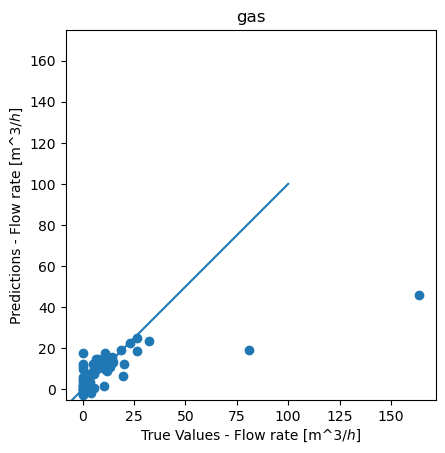

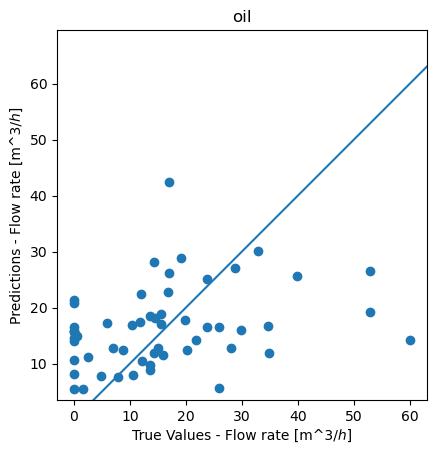

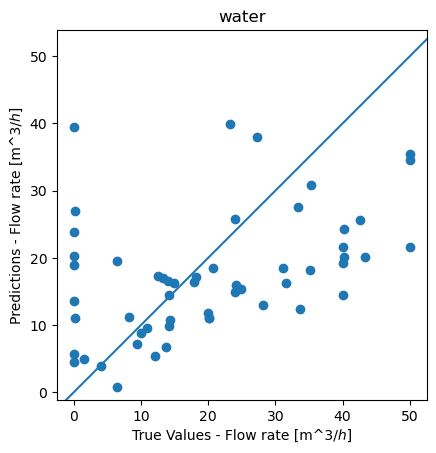

In [113]:
# Run predict
Y_pred = model.predict(final_test_X)
gas_pred = Y_pred[0]
oil_pred = Y_pred[1]
water_pred = Y_pred[2]
plot_diff(final_test_Y[0], Y_pred[0], title='gas')
plot_diff(final_test_Y[1], Y_pred[1], title='oil')
plot_diff(final_test_Y[2], Y_pred[2], title='water')

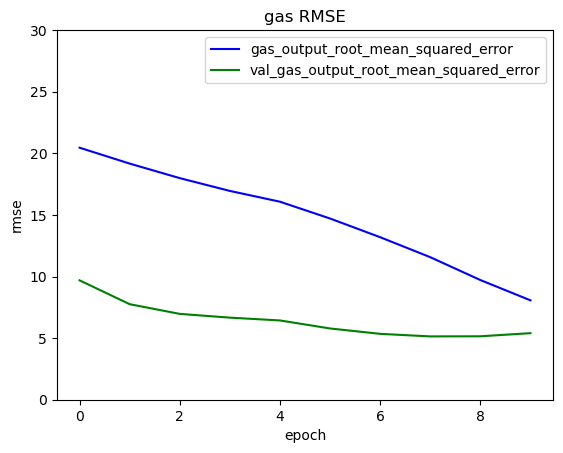

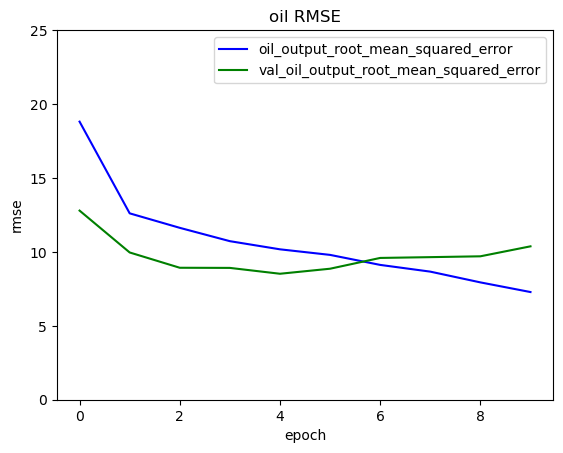

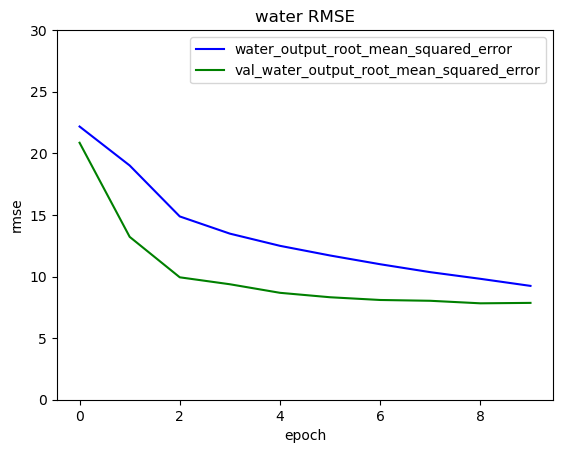

In [114]:
# Plot RMSE
plot_metrics(metric_name='gas_output_root_mean_squared_error', title='gas RMSE', ylim=30)
plot_metrics(metric_name='oil_output_root_mean_squared_error', title='oil RMSE', ylim=25)
plot_metrics(metric_name='water_output_root_mean_squared_error', title='water RMSE', ylim=30)

In [119]:
Y_pred = np.squeeze(Y_pred)

In [120]:
#Create a DataFrame of different parameters for each of the test images
import pandas as pd
pred_df = pd.DataFrame({
                        "gas_true": final_test_Y[0],
                        "gas_preds": Y_pred[0],
                        "oil_true": final_test_Y[1],
                        "oil_preds": Y_pred[1],
                        "water_true": final_test_Y[2],
                        "water_preds": Y_pred[2]})
pred_df

,gas_true,gas_preds,oil_true,oil_preds,water_true,water_preds
0,5.446443,7.725938,7.802234,7.544499,17.811947,16.400234
1,18.490943,19.407412,52.934467,19.233105,35.321300,30.797844
2,26.617914,18.539612,52.801797,26.523815,35.199214,18.156391
3,3.680254,3.691072,13.633987,8.817898,14.163469,9.906630
4,6.709290,14.862144,12.156320,10.475992,12.527703,17.259409
5,11.134832,9.617506,19.923563,17.860832,20.085011,10.966076
6,14.088435,15.844989,15.580381,18.924515,10.894630,9.580424
7,0.155233,-2.363753,10.573452,7.988682,1.501769,4.901714
8,4.071209,-1.587146,34.800624,11.860442,14.953140,16.290504
9,3.291336,7.547274,14.250283,28.213064,33.346524,27.505913


In [121]:
# Test the model and print loss and rmse (test data)
loss, Y1_loss, Y2_loss, Y3_loss, Y1_rmse, Y2_rmse, Y3_rmse = model.evaluate(x=final_test_X, y=final_test_Y)

print()
print(f'loss: {loss}')
print(f'gas_loss: {Y1_loss}')
print(f'oil_loss: {Y2_loss}')
print(f'water_loss: {Y3_loss}')
print(f'gas_rmse: {Y1_rmse}')
print(f'oil_rmse: {Y2_rmse}')
print(f'water_rmse: {Y3_rmse}')

2/2 [==============================] - 0s 5ms/step - loss: 739.5801 - gas_output_loss: 352.5681 - oil_output_loss: 190.2099 - water_output_loss: 196.8021 - gas_output_root_mean_squared_error: 18.7768 - oil_output_root_mean_squared_error: 13.7917 - water_output_root_mean_squared_error: 14.0286

loss: 739.5801391601562
gas_loss: 352.568115234375
oil_loss: 190.2099151611328
water_loss: 196.80209350585938
gas_rmse: 18.776796340942383
oil_rmse: 13.791661262512207
water_rmse: 14.028616905212402


In [122]:
# Save model
model.save('./model_flow_rate_final_only_3_channel/', save_format='tf')

INFO:tensorflow:Assets written to: ./model_flow_rate_final_only_3_channel/assets


INFO:tensorflow:Assets written to: ./model_flow_rate_final_only_3_channel/assets


In [123]:
# # Restore model
loaded_model = tf.keras.models.load_model('./model_flow_rate_final_only_3_channel/')

In [124]:
# Run predict with restored model
predictions = loaded_model.predict(norm_test_X)
gas_pred = predictions[0]
oil_pred = predictions[1]
water_pred = predictions[2]

2/2 [==============================] - 0s 3ms/step


In [125]:
pred_df.to_csv('predictions_and_true_with_only_3_channels.csv', index=True)

In [126]:
# Test the model and print loss and rmse (test data)
loss, Y1_loss, Y2_loss, Y3_loss, Y1_rmse, Y2_rmse, Y3_rmse = loaded_model.evaluate(x=final_test_X, y=final_test_Y)

print()
print(f'loss: {loss}')
print(f'gas_loss: {Y1_loss}')
print(f'oil_loss: {Y2_loss}')
print(f'water_loss: {Y3_loss}')
print(f'gas_rmse: {Y1_rmse}')
print(f'oil_rmse: {Y2_rmse}')
print(f'water_rmse: {Y3_rmse}')

2/2 [==============================] - 0s 5ms/step - loss: 739.5801 - gas_output_loss: 352.5681 - oil_output_loss: 190.2099 - water_output_loss: 196.8021 - gas_output_root_mean_squared_error: 18.7768 - oil_output_root_mean_squared_error: 13.7917 - water_output_root_mean_squared_error: 14.0286

loss: 739.5801391601562
gas_loss: 352.568115234375
oil_loss: 190.2099151611328
water_loss: 196.80209350585938
gas_rmse: 18.776796340942383
oil_rmse: 13.791661262512207
water_rmse: 14.028616905212402
